In [1]:
__depends__ = ["../results/ebtel_varying_flux_limiter_results.pickle"]
__dest__ = "../results/f2.eps"

# Plot Flux-limiter EM Distributions
Plot the emission measure distributions, $\mathrm{EM}(T)$, for varying values of $f$, the coefficient that controls the strength of the heat flux limiting.

In [2]:
import os
import sys
import pickle

import numpy as np
from scipy.optimize import curve_fit
import seaborn.apionly as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

sys.path.append(os.path.join(os.environ['EXP_DIR'],'EBTEL_analysis/src'))
import em_binner as emb

%matplotlib inline

In [3]:
plt.rcParams.update({'figure.figsize' : [8,8]})

First, load the EBTEL results.

In [4]:
with open(__depends__[0],'rb') as f:
    ebtel_results = pickle.load(f)

Define some parameters for labeling.

In [5]:
flux_limiter_labels = [r'$f=1$',r'$f=0.53$',r'$f=1/6$',r'$f=0.1$',r'$f=1/30$',r'$\mathrm{Spitzer}$']

Set some parameters for doing some quick curve fitting to derive the emission measure slope.

In [6]:
Ta = 7.0
Tb = 7.5
def pl_func(x,a,b):
    return a + b*x

Now, build the plot. We only show $\mathrm{EM}(T)$ for $T>T_M$ because the distributions are identical at cool temperatures.

Cannot find fit for $f=1$
Cannot find fit for $f=0.53$
Cannot find fit for $f=1/6$
Cannot find fit for $f=0.1$
Value of the slope for $f=1/30$ is b=-2.565351
Cannot find fit for $\mathrm{Spitzer}$


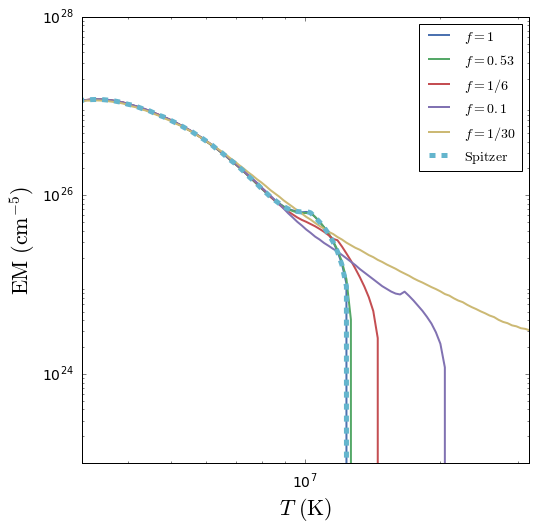

In [7]:
fig = plt.figure()
ax = fig.gca()
for i in range(len(ebtel_results)):
    binner = emb.EM_Binner(2.*ebtel_results[i]['loop_length'],time=ebtel_results[i]['t'],temp=ebtel_results[i]['T'],
                           density=ebtel_results[i]['n'])
    binner.build_em_dist()
    hist,bin_edges = np.histogram(binner.T_em_flat,bins=binner.T_em_histo_bins,weights=np.array(binner.em_flat))
    if ebtel_results[i]['heat_flux_option']=='classical':
        ls='--'
        lw=5
        marker=''
    else:
        ls = 'solid'
        lw=2
        marker=''
    ax.plot((bin_edges[:-1]+bin_edges[1:])/2,hist/10,color=sns.color_palette('deep')[i],
               linestyle=ls,label=flux_limiter_labels[i],linewidth=lw,marker=marker,markersize=10,markevery=5)
    #Curve fitting
    logT = np.log10((bin_edges[:-1]+bin_edges[1:])/2)
    logem = np.log10(hist/10)
    T_fit = logT[(logT>=Ta) & (logT<=Tb)]
    em_fit = logem[(logT>=Ta) & (logT<=Tb)]
    try:
        popt,pcov = curve_fit(pl_func,T_fit,em_fit)
        print('Value of the slope for %s is b=%f'%(flux_limiter_labels[i],popt[1]))
    except ValueError:
        print('Cannot find fit for %s'%flux_limiter_labels[i])
    
#aesthetics
#scale
ax.set_yscale('log')
ax.set_xscale('log')
#limits
ax.set_ylim([1e+23,1e+28])
ax.set_xlim([10**6.5,10**7.5])
#ticks
ax.yaxis.set_major_locator(ticker.LogLocator(numticks=5))
#labels
ax.set_xlabel(r'$T\,\,\mathrm{(K)}$')
ax.set_ylabel(r'$\mathrm{EM}\,\,(\mathrm{cm}^{-5})$')
#legend
ax.legend(loc='best')
#save
plt.savefig(__dest__)
plt.show()